## Contents
* Linear regression
* Kernel density estimation 


## References
* load 'weight-height.csv' from Kaggle (https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv)  
* install python library (scikit-learn, numpy, matplotlib, scipy)  




### 1. Linear regression


* 선형회귀 (Linear regression) 은 y 와 X 데이터 간의 선형 상관 관계를 이용하여 알려지지 않은 데이터를 예측 
* weight-height 의 관계를 최소제곱법 (Least Squares) 를 이용하여 구현

    * \\( loss = \frac{\sum(w^Tx+b-y)^2}{N}  \\)
    * \\( \nabla loss_w = \frac{\sum(2x)(w^Tx+b-y) }{N} \\)
    * \\( \nabla loss_b = \frac{\sum(2)(w^Tx+b-y) }{N} \\)


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt

import csv
import math


In [2]:
X_csv = []; y_csv = []

with open('weight-height.csv', newline='') as csvfile:
    
    csvreader = csv.reader(csvfile, delimiter=',')
    
    next(csvreader)
    for row in csvreader:
        X_csv.append(float(row[1]))
        y_csv.append(float(row[2]))
        
print(len(X_csv))

10000


Text(0, 0.5, 'height')

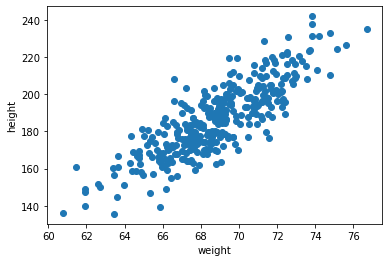

In [3]:
X = np.array(X_csv[:500])
y = np.array(y_csv[:500])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

plt.scatter(X_train, y_train)
plt.xlabel('weight')
plt.ylabel('height')


In [4]:

def linear_regression_train(x, y, weight, bias, learning_rate):
    
    n_data = len(x)
    epochs = 5

    for i in range(epochs):
    
        y_hat =  weight * x + bias
        loss = np.sum((y_hat - y) ** 2) / n_data

        gradient_w = np.sum((y_hat - y) * (2) * x) / n_data
        gradient_b = np.sum((y_hat - y) * (2)) / n_data

        weight -= (learning_rate * gradient_w)
        bias -= (learning_rate * gradient_b)

        print('Epochs {}/{}, loss {:.3f}, weight {:.3f}, bias {:.3f}'.format(i, epochs, loss, weight, bias))
    
        
    print('weight: ', weight)
    print('bias: ', bias)
    
    return weight, bias

def linear_regression_predict(x, weight, bias): 
    return weight * x + bias
    
        

In [5]:
# training 

W = 0.0
b = 0.0
eta = 0.0001

W, b = linear_regression_train(X_train, y_train, W, b, eta)


Epochs 0/5, loss 35267.885, weight 2.580, bias 0.037
Epochs 1/5, loss 278.556, weight 2.712, bias 0.039
Epochs 2/5, loss 185.897, weight 2.719, bias 0.039
Epochs 3/5, loss 185.651, weight 2.719, bias 0.039
Epochs 4/5, loss 185.651, weight 2.719, bias 0.039
weight:  2.7194801479670447
bias:  0.03912433995531146


root mean squared error (train):  13.62536400552916


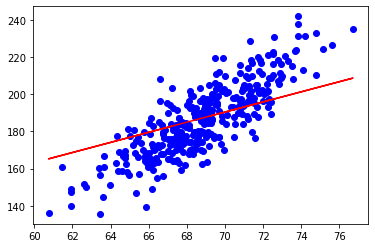

In [6]:
# visualize linear regression trend

y_pred = linear_regression_predict(X_train, W, b)

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, y_pred, color='r')

print('root mean squared error (train): ', mean_squared_error(y_train, y_pred)**0.5)

In [7]:
W = 20000.0
b = 0.0
eta = 0.0001

W, b = linear_regression_train(X_train, y_train, W, b, eta)


Epochs 0/5, loss 1896163072159.089, weight 1035.790, bias -275.196
Epochs 1/5, loss 5021451008.922, weight 59.876, bias -289.358
Epochs 2/5, loss 13298005.534, weight 9.655, bias -290.087
Epochs 3/5, loss 35330.637, weight 7.070, bias -290.124
Epochs 4/5, loss 208.198, weight 6.937, bias -290.126
weight:  6.937391922491484
bias:  -290.12632871232745


root mean squared error (train):  10.732501783295186


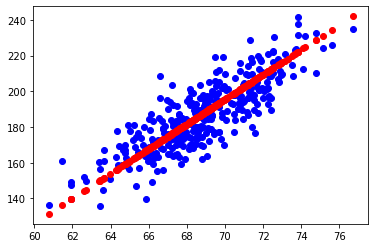

In [8]:
# predict
y_pred = linear_regression_predict(X_train, W, b)

plt.scatter(X_train, y_train, color='b')
plt.scatter(X_train, y_pred, color='r')

print('root mean squared error (train): ', mean_squared_error(y_train, y_pred)**0.5)

root mean squared error (test):  11.11585765042145


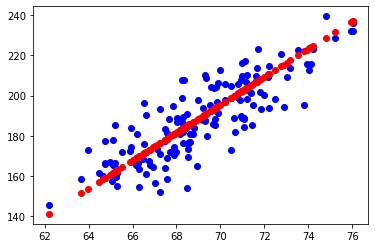

In [9]:
# predict
y_pred = linear_regression_predict(X_test, W, b)

plt.scatter(X_test, y_test, color='b')
plt.scatter(X_test, y_pred, color='r')

print('root mean squared error (test): ', mean_squared_error(y_test, y_pred)**0.5)

### 2. Kernel density regression  


* Kernel density regession 은 non-parametric 방법으로 확률 변수의 조건부 기대값을 예측하는 방법

    * \\( m_h(x) = \frac{\sum_{i}K_h (x - x_i) y_i}{\sum_j K_h (x - x_j)}   \\)
    * \\( K_h : \\) kernel with a bandwith h


In [10]:
class Gaussian_Kernel_Regression:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
        
    def gaussian_kernel(self, x):
        return (1 / math.sqrt(2*math.pi))*math.exp(-0.5*x**2)

    def predict(self, x):
        kernels = [ self.gaussian_kernel((xi-x)/self.b) for xi in self.x ]
        y_pred = np.dot([ (kernel/np.sum(kernels)) for kernel in kernels ], self.y)
        return y_pred

    

root mean squared error:  10.831412409255572


Text(0.5, 1.0, 'Kernel density regression')

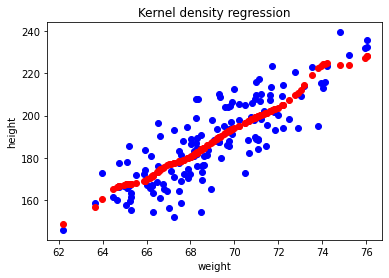

In [11]:
# bandwidth : 0.5, 0.05, 5.0

kde1 = Gaussian_Kernel_Regression(X_train, y_train, 0.5)
y_pred = [ kde1.predict(x_i) for x_i in X_test ]

print('root mean squared error: ', mean_squared_error(y_test, y_pred)**0.5)

plt.scatter(X_test, y_test, color='b')
plt.scatter(X_test, y_pred, color='r')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Kernel density regression')


root mean squared error (test):  11.613508095514321


Text(0.5, 1.0, 'Kernel density regression')

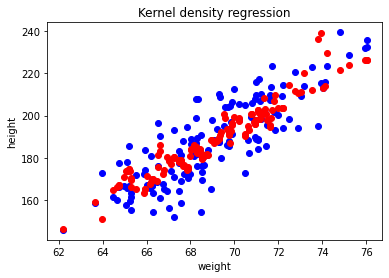

In [12]:
kde2 = Gaussian_Kernel_Regression(X_train, y_train, 0.05)
y_pred = [ kde2.predict(x_i) for x_i in X_test ]

print('root mean squared error (test): ', mean_squared_error(y_test, y_pred)**0.5)

plt.scatter(X_test, y_test, color='b')
plt.scatter(X_test, y_pred, color='r')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Kernel density regression')


root mean squared error (test):  16.74171154073543


Text(0.5, 1.0, 'Kernel density regression')

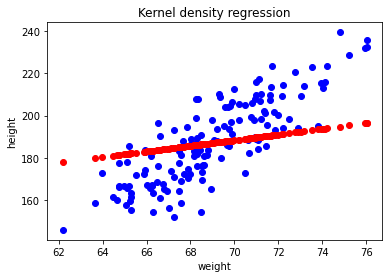

In [13]:
kde3 = Gaussian_Kernel_Regression(X_train, y_train, 5)
y_pred = [ kde3.predict(x_i) for x_i in X_test ]


print('root mean squared error (test): ', mean_squared_error(y_test, y_pred)**0.5)

plt.scatter(X_test, y_test, color='b')
plt.scatter(X_test, y_pred, color='r')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Kernel density regression')

